# [Hotel Booking Demand](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)
![image](https://storage.googleapis.com/kaggle-datasets-images/511638/944030/a5363784c50661435af251da741c9ba6/dataset-cover.jpg?t=2020-02-13-01-47-43)

In [50]:
!pip install pycountry # to see if the country code in the data is correct

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 27.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=cf6824d351f7ecd245596adf868d867ad38d896d401a85ae98f40b9fdc8c6ba4
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [156]:
# importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pycountry as pc
import numpy as np

In [295]:
# reading dataset into data frame
bookings = pd.read_csv('https://intro-datascience.s3.us-east-2.amazonaws.com/Resort01.csv', na_values='NULL')
bookings.shape

(40060, 20)

In [296]:
# first 5 rows of the data
bookings.head()

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,342,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,3,No Deposit,Transient,0,0
1,0,737,0,0,2,0,0,BB,PRT,Direct,0,0,0,C,C,4,No Deposit,Transient,0,0
2,0,7,0,1,1,0,0,BB,GBR,Direct,0,0,0,A,C,0,No Deposit,Transient,0,0
3,0,13,0,1,1,0,0,BB,GBR,Corporate,0,0,0,A,A,0,No Deposit,Transient,0,0
4,0,14,0,2,2,0,0,BB,GBR,Online TA,0,0,0,A,A,0,No Deposit,Transient,0,1


In [297]:
# checking how many duplicated rows are there
bookings.duplicated().sum()

8226

In [298]:
bookings.drop_duplicates(keep='first', inplace=True)

In [299]:
bookings.info() # exploring structure of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31834 entries, 0 to 40059
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   IsCanceled                   31834 non-null  int64 
 1   LeadTime                     31834 non-null  int64 
 2   StaysInWeekendNights         31834 non-null  int64 
 3   StaysInWeekNights            31834 non-null  int64 
 4   Adults                       31834 non-null  int64 
 5   Children                     31834 non-null  int64 
 6   Babies                       31834 non-null  int64 
 7   Meal                         31834 non-null  object
 8   Country                      31408 non-null  object
 9   MarketSegment                31834 non-null  object
 10  IsRepeatedGuest              31834 non-null  int64 
 11  PreviousCancellations        31834 non-null  int64 
 12  PreviousBookingsNotCanceled  31834 non-null  int64 
 13  ReservedRoomType             31

**There are a few missing values in the country column. The non-null count for this column is 39596, but it should be 40060.**

# Data Cleaning - calculating NA values in the data

In [300]:
bookings.isna().sum()

IsCanceled                       0
LeadTime                         0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        426
MarketSegment                    0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
CustomerType                     0
RequiredCarParkingSpaces         0
TotalOfSpecialRequests           0
dtype: int64

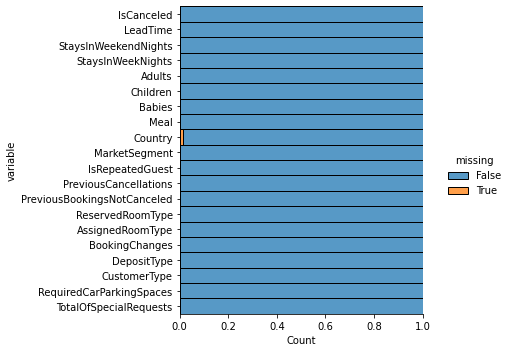

In [301]:
# plotting NA values for each column
sns.displot(
    data=bookings.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.25
)

In [302]:
# Descriptive Statistics
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
IsCanceled,31834.0,0.241817,0.428191,0.0,0.0,0.0,0.0,1.0
LeadTime,31834.0,85.219388,91.075751,0.0,10.0,50.0,140.0,737.0
StaysInWeekendNights,31834.0,1.251304,1.165122,0.0,0.0,1.0,2.0,19.0
StaysInWeekNights,31834.0,3.252969,2.504116,0.0,1.0,3.0,5.0,50.0
Adults,31834.0,1.889835,0.749258,0.0,2.0,2.0,2.0,55.0
Children,31834.0,0.157787,0.488180,0.0,0.0,0.0,0.0,10.0
Babies,31834.0,0.017309,0.132571,0.0,0.0,0.0,0.0,2.0
IsRepeatedGuest,31834.0,0.050104,0.218162,0.0,0.0,0.0,0.0,1.0
PreviousCancellations,31834.0,0.022272,0.347191,0.0,0.0,0.0,0.0,26.0
PreviousBookingsNotCanceled,31834.0,0.178928,1.116960,0.0,0.0,0.0,0.0,30.0


# Exploratory Data Analysis

Our target variable is the IsCanceled column shows whether a customer canceled the reservation.

In [303]:
bookings['IsCanceled'].value_counts()

0    24136
1     7698
Name: IsCanceled, dtype: int64

Text(0.5, 1.0, 'Wether Customer Canceled the Reservation')

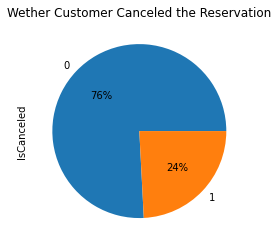

In [304]:
bookings['IsCanceled'].value_counts().plot(kind='pie', autopct='%.0f%%')
plt.title('Wether Customer Canceled the Reservation')

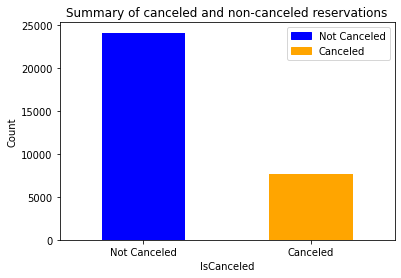

In [305]:
# plotting 'ISCanceled' on a bar graph
canceled_count = bookings['IsCanceled'].value_counts()
d = {0: 'Not Canceled', 1: 'Canceled'}
canceled_count = canceled_count.rename(d)

canceled_count.plot(kind='bar',color=['blue','orange'])
plt.title('Summary of canceled and non-canceled reservations')
plt.xticks(rotation=0)
plt.xlabel('IsCanceled')
plt.ylabel('Count')

canceled = mpatches.Patch(color='blue', label='Not Canceled')
not_canceled = mpatches.Patch(color='orange', label='Canceled')
plt.legend(handles=[canceled,not_canceled], loc='best')


Text(0, 0.5, 'Count')

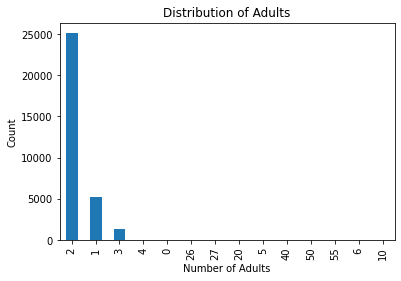

In [306]:
# plotting 'Adults' on a bar graph
bookings['Adults'].value_counts().plot(kind='bar')
plt.title('Distribution of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

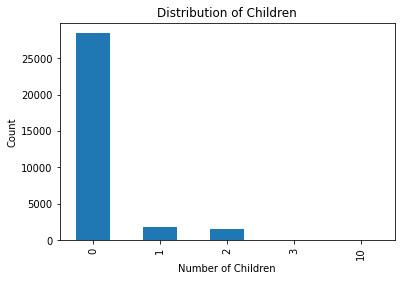

In [307]:
# plotting "Children" on a bar graph
bookings['Children'].value_counts().plot(kind='bar')
plt.title('Distribution of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

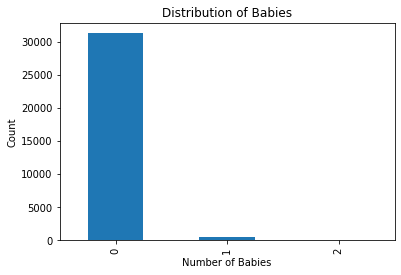

In [308]:
# plotting "Babies" on a bar graph
bookings['Babies'].value_counts().plot(kind='bar')
plt.title('Distribution of Babies')
plt.xlabel('Number of Babies')
plt.ylabel('Count')

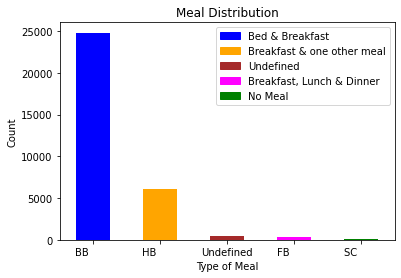

In [309]:
from traitlets.traitlets import Undefined
# plotting "Meal Plan" on a bar graph
bookings['Meal'].value_counts().plot(kind='bar', color=['blue', 'orange', 'brown', 'magenta', 'green'])
plt.xticks(rotation=0)
plt.title('Meal Distribution')
plt.xlabel('Type of Meal')
plt.ylabel('Count')

bb = mpatches.Patch(color='blue', label='Bed & Breakfast')
hb = mpatches.Patch(color='orange', label='Breakfast & one other meal')
undefined = mpatches.Patch(color='brown', label='Undefined')
fb = mpatches.Patch(color='magenta', label='Breakfast, Lunch & Dinner')
sc = mpatches.Patch(color='green', label='No Meal')


plt.legend(handles=[bb,hb,undefined,fb,sc], loc='best')

Text(0, 0.5, 'Count')

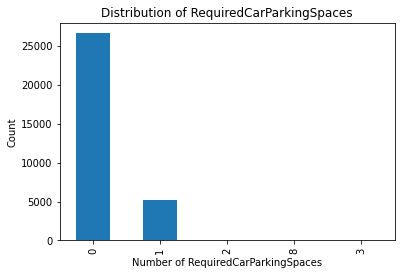

In [310]:
# plotting "Required Car Parking Spaces" on a bar graph
bookings['RequiredCarParkingSpaces'].value_counts().plot(kind='bar')
plt.title('Distribution of RequiredCarParkingSpaces')
plt.xlabel('Number of RequiredCarParkingSpaces')
plt.ylabel('Count')

In [ ]:
# plotting "IsCanceled" Vs Market Segment" on a bar graph


# Assocution Rule Mining

Association Rule Mining is an unsupervised learning technique that gives out interesting patterns in the data which are not trivial just by looking at the dataset. For this algorithm, the columns used should be categorical. These columns are already nominal:
```
 7   Meal                         40060 non-null  object
 8   Country                      39596 non-null  object
 9   MarketSegment                40060 non-null  object
 13  ReservedRoomType             40060 non-null  object
 14  AssignedRoomType             40060 non-null  object
 16  DepositType                  40060 non-null  object
 17  CustomerType                 40060 non-null  object
```

Below columns need to be converted to categorical variable by studying the distribution and summary statistics:
```
 0   IsCanceled                   40060 non-null  int64 
 1   LeadTime                     40060 non-null  int64 
 2   StaysInWeekendNights         40060 non-null  int64 
 3   StaysInWeekNights            40060 non-null  int64 
 4   Adults                       40060 non-null  int64 
 5   Children                     40060 non-null  int64 
 6   Babies                       40060 non-null  int64 
 10  IsRepeatedGuest              40060 non-null  int64 
 11  PreviousCancellations        40060 non-null  int64 
 12  PreviousBookingsNotCanceled  40060 non-null  int64 
 15  BookingChanges               40060 non-null  int64 
 18  RequiredCarParkingSpaces     40060 non-null  int64 
 19  TotalOfSpecialRequests       40060 non-null  int64 
```

In [311]:
bookings['IsCanceled'].replace({0:'Not_Canceled',1:'Canceled'}, inplace=True)

In [312]:
bookings['IsRepeatedGuest'].replace({0:'RepeatedGuest_No', 1:'RepeatedGuest_Yes'}, inplace=True)

In [313]:
bookings['Children'].value_counts()

0     28436
1      1798
2      1582
3        17
10        1
Name: Children, dtype: int64

In [316]:
bookings['Children'].replace({0:'0', 1:'1', 2:'2', 3:'3', 10:'10'}, inplace=True)

In [317]:
bookings['Babies'].value_counts()

0    31292
1      533
2        9
Name: Babies, dtype: int64

In [318]:
bookings['Babies'].replace({0:'0', 1:'1', 2:'2'}, inplace=True)

In [319]:
bookings['LeadTime'].describe()

count    31834.000000
mean        85.219388
std         91.075751
min          0.000000
25%         10.000000
50%         50.000000
75%        140.000000
max        737.000000
Name: LeadTime, dtype: float64

Text(0.5, 1.0, 'Distribution of LeadTime')

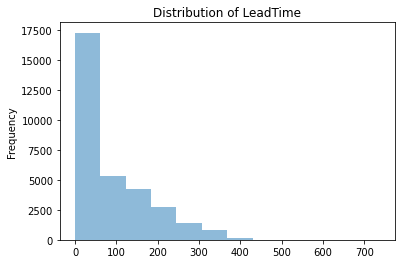

In [320]:
bookings['LeadTime'].plot.hist(bins=12, alpha=0.5)
plt.title('Distribution of LeadTime')

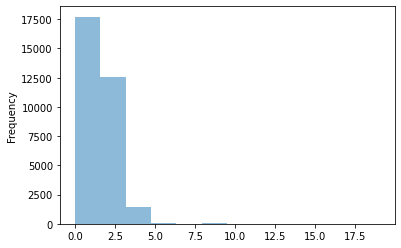

In [321]:
bookings['StaysInWeekendNights'].plot.hist(bins=12, alpha=0.5)

In [322]:
bookings['Adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

# Decision Tree